<b>By:</b>: Uğur Ali Kaplan<br/>


<h2><b>A.1) Importing Datasets</b></h2>

In [1]:
#########################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import math
import random
##########################
df1 = pd.read_csv("train1.csv") 
df2 = pd.read_csv("train2.csv") 
df2m = pd.read_csv("train2_modified.csv") # will be used in Part D

<h2><b>A.2) Drawing Covariance Matrices</b></h2>

First, define the necessary functions.

In [2]:
def get_cov(x, y):
    """
    Input: pd.Series -> x and y
    Returns: Covariance(x, y)
    """
    
    x, y = x.to_numpy(), y.to_numpy()
    element_count = x.shape[0]
    assert y.shape[0] == element_count, "Given series are not of the same size."
    mu_x, mu_y = np.mean(x), np.mean(y)
    
    x, y = x - mu_x, y - mu_y
    return np.dot(x, y)/element_count

In [3]:
def get_cov_mat(df):
    """
    Input: pd.DataFrame
    Returns: Covariance Matrix of the dataframe as pd.DataFrame
    """
    
    d = len(df.columns)
    matrix = np.empty((d, d))
    columns = df.columns
    for i, col in enumerate(columns):
        for j, col2 in enumerate(columns):
            matrix[i, j] = get_cov(df[col], df[col2])
    return pd.DataFrame(matrix, index=columns, columns=columns)

In [4]:
def draw_matrix(cov_mtrx):
    alpha = ['x1', 'x2']
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cov_mtrx,interpolation='nearest')
    fig.colorbar(cax)
    ax.set_xticklabels(['']+alpha)
    ax.set_yticklabels(['']+alpha)

Now, we can see the covariance matrices.

<h4><b>a) Covariance Matrix for Dataset 1, y=1</b></h4>

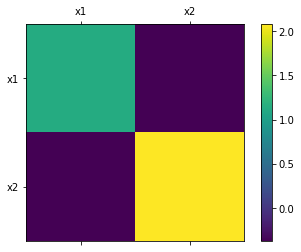

In [5]:
cov_mtrx = get_cov_mat(df1[df1.y == 1][["x1", "x2"]])
draw_matrix(cov_mtrx)

For class 1, we notice that x1's variance is less than x2's so usually values of x1 will be closer to its mean.

We also notice that x1 and x2 has negative correlation however it is a weak correlation.

<h4><b>b) Covariance Matrix for Dataset 1, y=0</b></h4>

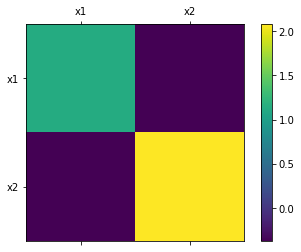

In [6]:
cov_mtrx = get_cov_mat(df1[df1.y == 0][["x1", "x2"]])
draw_matrix(cov_mtrx)

For class 0, we see that covariance matrix is the same as class 1. So we conclude classes share a common covariance matrix.

<h4><b>c) Covariance Matrix for Dataset 2, y=1</b></h4>

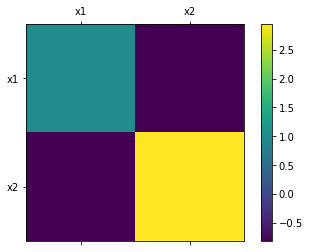

In [7]:
cov_mtrx = get_cov_mat(df2[df2.y == 1][["x1", "x2"]])
draw_matrix(cov_mtrx)

For this dataset's class 1, we notice there is a stronger negative correlation between features x1 and x2 compared to dataset 1.

We also notice x1 varies less, so we expect the values in x1 to be distributed close to their mean and x2 to vary more.

<h4><b>d) Covariance Matrix for Dataset 2, y=0</b></h4>

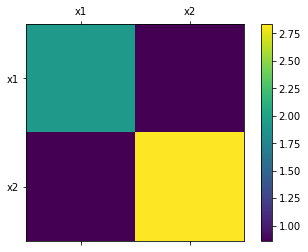

In [8]:
cov_mtrx = get_cov_mat(df2[df2.y == 0][["x1", "x2"]])
draw_matrix(cov_mtrx)

In this case, we can see that covariance matrices are different between classes. x1's variance is higher. Also, we have a positive correlation between x1 and x2.

<h2><b>A.3) Feature Histograms</b></h2>

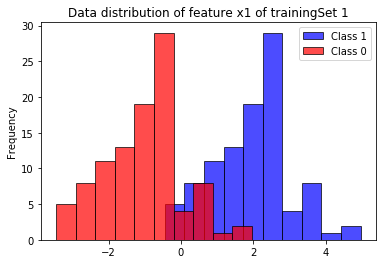

In [9]:
plt.hist(df1[df1.y==1]["x1"], color=("blue"), alpha=0.7, edgecolor='black')
plt.hist(df1[df1.y==0]["x1"], color=("red"), alpha=0.7, edgecolor='black')
plt.gca().set(title='Data distribution of feature x1 of trainingSet 1', ylabel='Frequency')
plt.legend(("Class 1", "Class 0"))
plt.show()

Here, we can see that underlying distribution is same, but means are different for classes 0 and 1. However, even though we have assumed Gaussian, distribution does not look like Gaussian distribution and data is left skewed.

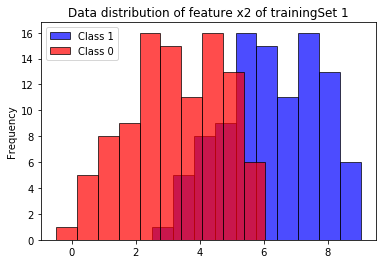

In [10]:
plt.hist(df1[df1.y==1]["x2"], color=("blue"), alpha=0.7, edgecolor='black')
plt.hist(df1[df1.y==0]["x2"], color=("red"), alpha=0.7, edgecolor='black')

plt.gca().set(title='Data distribution of feature x2 of trainingSet 1', ylabel='Frequency')
plt.legend(("Class 1", "Class 0"))
plt.show()

Here, we see that values of x2 tend to be more positive. Also, distribution of the data is the same in classes 0 and 1 however, their means are different. Data resembles Gaussian more, compared to the distribution of x1.

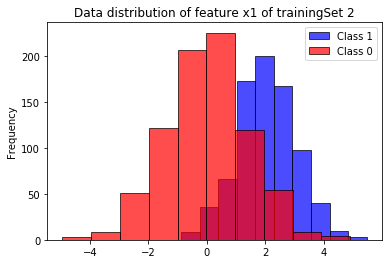

In [11]:
plt.hist(df2[df2.y==1]["x1"], color=("blue"), alpha=0.7, edgecolor='black')
plt.hist(df2[df2.y==0]["x1"], color=("red"), alpha=0.7, edgecolor='black')

plt.gca().set(title='Data distribution of feature x1 of trainingSet 2', ylabel='Frequency')
plt.legend(("Class 1", "Class 0"))
plt.show()

Here, we see that there variance of x1 is higher in class 0, compared to class 1. They resemble Gaussian distribution.

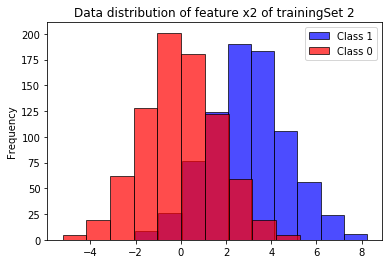

In [12]:
a = plt.hist(df2[df2.y==1]["x2"], color=("blue"), alpha=0.7, edgecolor='black')
a = plt.hist(df2[df2.y==0]["x2"], color=("red"), alpha=0.7, edgecolor='black')

plt.gca().set(title='Data distribution of feature x2 of trainingSet 2', ylabel='Frequency')
plt.legend(("Class 1", "Class 0"))
plt.show()

Here, we see that data distribution resembles Gaussian. Also, x2 tends to get more positive in class 1, compared to class 0.

<h2><b>A.4) Feature Scatter Plots</b></h2>

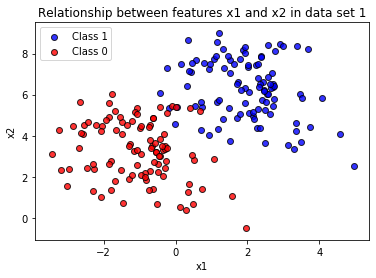

In [13]:
plt.scatter(df1[df1.y == 1]["x1"], df1[df1.y == 1]["x2"], c="blue", alpha=0.8, edgecolors="black")
plt.scatter(df1[df1.y == 0]["x1"], df1[df1.y == 0]["x2"], c="red", alpha=0.8, edgecolors="black")
plt.legend(("Class 1", "Class 0"))
plt.gca().set(title='Relationship between features x1 and x2 in data set 1', ylabel='x2', xlabel='x1')
plt.show()

When we consider both features, same classes tend to stay closer so it will be easy to classify points. Only part that will be hard for our classifier is to seperate data points in the middle of the feature space since different classes are mixed there.

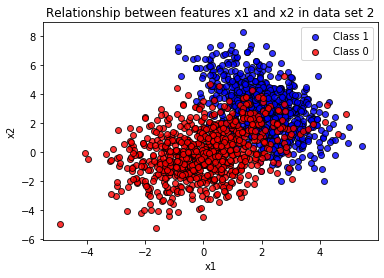

In [14]:
plt.scatter(df2[df2.y == 1]["x1"], df2[df2.y == 1]["x2"], c="blue", alpha=0.8, edgecolors="black")
plt.scatter(df2[df2.y == 0]["x1"], df2[df2.y == 0]["x2"], c="red", alpha=0.8, edgecolors="black")
plt.legend(("Class 1", "Class 0"))
plt.gca().set(title='Relationship between features x1 and x2 in data set 2', ylabel='x2', xlabel='x1')
plt.show()

We see that there are a lot more data points in data set 2 and also it is possible to classify points when we consider both of the features. However, it will be harder for our classifier to classify since different classes are so close in space so our classifier might fail to draw a good seperating line.

<hr />

<h2><b>B.1) Means and Covariances</b></h2>

In [15]:
# This code block is given in the template.
test1 = pd.read_csv("test1.csv")
test2 = pd.read_csv("test2.csv")

<h4><b>Dataset 1</b></h4>

In [16]:
print("Mean vector of dataset 1, class 0:", np.mean(np.array(df1[df1.y == 0][["x1", "x2"]]), axis=0))

Mean vector of dataset 1, class 0: [-1.04624698  3.26924606]


In [17]:
print("Covariance matrix of dataset 1, class 0:\n", get_cov_mat(df1[df1.y == 0][["x1", "x2"]]))

Covariance matrix of dataset 1, class 0:
           x1        x2
x1  1.135571 -0.373204
x2 -0.373204  2.083272


In [18]:
print("Mean vector of dataset 1, class 1:", np.mean(np.array(df1[df1.y == 1][["x1", "x2"]]), axis=0))

Mean vector of dataset 1, class 1: [1.95375302 6.26924606]


In [19]:
print("Covariance matrix of dataset 1, class 1:\n", get_cov_mat(df1[df1.y == 1][["x1", "x2"]]))

Covariance matrix of dataset 1, class 1:
           x1        x2
x1  1.135571 -0.373204
x2 -0.373204  2.083272


<h4><b>Dataset 2</b></h4>

In [20]:
print("Mean vector of dataset 2, class 0:", np.mean(np.array(df2[df2.y == 0][["x1", "x2"]]), axis=0))

Mean vector of dataset 2, class 0: [ 0.00246486 -0.01971604]


In [21]:
print("Covariance matrix of dataset 2, class 0:\n", get_cov_mat(df2[df2.y == 0][["x1", "x2"]]))

Covariance matrix of dataset 2, class 0:
           x1        x2
x1  1.919709  0.856905
x2  0.856905  2.835795


In [22]:
print("Mean vector of dataset 2, class 1:", np.mean(np.array(df2[df2.y == 1][["x1", "x2"]]), axis=0))

Mean vector of dataset 2, class 1: [2.0536608  2.97765078]


In [23]:
print("Covariance matrix of dataset 2, class 1:\n", get_cov_mat(df2[df2.y == 1][["x1", "x2"]]))

Covariance matrix of dataset 2, class 1:
           x1        x2
x1  0.996452 -0.817780
x2 -0.817780  2.945942


<h2><b>B.2) Calculating Discriminant Function</b></h2>

In [24]:
def trainBayes(trainingSamples, trainingLabels):
    mu_class0 = np.mean(np.array(trainingSamples[trainingLabels == 0][["x1", "x2"]]), axis=0)
    mu_class1 = np.mean(np.array(trainingSamples[trainingLabels == 1][["x1", "x2"]]), axis=0)
    cov_mat0 = np.array(get_cov_mat(trainingSamples[trainingLabels == 0][["x1", "x2"]]))
    cov_mat1 = np.array(get_cov_mat(trainingSamples[trainingLabels == 1][["x1", "x2"]]))
    ln_pc0 = np.log(trainingSamples[trainingLabels == 0].shape[0])
    ln_pc1 = np.log(trainingSamples[trainingLabels == 1].shape[0])
    trainingSamples = np.array(trainingSamples)
    g_0, g_1 = 0, 0
    
    if ((not np.allclose(mu_class0, mu_class1)) and np.allclose(cov_mat0, cov_mat1)):
        g_0 = (np.matmul(np.matmul((trainingSamples - mu_class0), np.linalg.inv(cov_mat0)), (trainingSamples - mu_class0).T).diagonal().reshape(-1, 1)/-2) + ln_pc0
        g_1 = (np.matmul(np.matmul((trainingSamples - mu_class1), np.linalg.inv(cov_mat1)), (trainingSamples - mu_class1).T).diagonal().reshape(-1, 1)/-2) + ln_pc1
    elif (np.allclose(cov_mat0 - np.diagflat(cov_mat0.diagonal()), 0) and np.allclose(cov_mat1 - np.diagflat(cov_mat1.diagonal()), 0)):
        g_0 = (-1 * (np.linalg.norm(trainingSamples - mu_class0, axis=1, keepdims=True) ** 2)) + ln_pc0
        g_1 = (-1 * (np.linalg.norm(trainingSamples - mu_class1, axis=1, keepdims=True) ** 2)) + ln_pc1
    else:
        g_0 = ((np.matmul(np.matmul((trainingSamples - mu_class0), np.linalg.inv(cov_mat0)), (trainingSamples - mu_class0).T).diagonal().reshape(-1, 1) + np.log(np.linalg.det(cov_mat0)))/-2) + ln_pc0
        g_1 = ((np.matmul(np.matmul((trainingSamples - mu_class1), np.linalg.inv(cov_mat1)), (trainingSamples - mu_class1).T).diagonal().reshape(-1, 1) + np.log(np.linalg.det(cov_mat1)))/-2) + ln_pc1
        
    return g_0, g_1

<h5><b>Dataset 1</b></h5>

In [25]:
g0, g1 = trainBayes(df1[["x1", "x2"]], df1["y"])
preds = np.zeros(g0.shape)
preds[g0 < g1] = 1
#print(preds)

acc = preds[preds == np.array(df1["y"]).reshape(-1, 1)].shape[0]/np.array(df1["y"]).shape[0] * 100
print(f'Training accuracy: {acc}%')
print(f'Training error: {100 - acc}%')

Training accuracy: 96.5%
Training error: 3.5%


<h5><b>Dataset 2</b></h5>

In [26]:
g0, g1 = trainBayes(df2[["x1", "x2"]], df2["y"])
preds = np.zeros(g0.shape)
preds[g0 < g1] = 1
acc = preds[preds == np.array(df2["y"]).reshape(-1, 1)].shape[0]/np.array(df2["y"]).shape[0] * 100
print(f'Training accuracy: {acc}%')
print(f'Training error: {100 - acc}%')

Training accuracy: 89.875%
Training error: 10.125%


<h2><b>B.3) Testing the Classifier</b></h2>

In [27]:
def testBayes(trainingSamples, trainingLabels, testSamples):
    mu_class0 = np.mean(np.array(trainingSamples[trainingLabels == 0][["x1", "x2"]]), axis=0)
    mu_class1 = np.mean(np.array(trainingSamples[trainingLabels == 1][["x1", "x2"]]), axis=0)
    cov_mat0 = np.array(get_cov_mat(trainingSamples[trainingLabels == 0][["x1", "x2"]]))
    cov_mat1 = np.array(get_cov_mat(trainingSamples[trainingLabels == 1][["x1", "x2"]]))
    ln_pc0 = np.log(trainingSamples[trainingLabels == 0].shape[0])
    ln_pc1 = np.log(trainingSamples[trainingLabels == 1].shape[0])
    testSamples = np.array(testSamples)
    g_0, g_1 = 0, 0
    
    if ((not np.allclose(mu_class0, mu_class1)) and np.allclose(cov_mat0, cov_mat1)):
        g_0 = (np.matmul(np.matmul((testSamples - mu_class0), np.linalg.inv(cov_mat0)), (testSamples - mu_class0).T).diagonal().reshape(-1, 1)/-2) + ln_pc0
        g_1 = (np.matmul(np.matmul((testSamples - mu_class1), np.linalg.inv(cov_mat1)), (testSamples - mu_class1).T).diagonal().reshape(-1, 1)/-2) + ln_pc1
    elif (np.allclose(cov_mat0 - np.diagflat(cov_mat0.diagonal()), 0) and np.allclose(cov_mat1 - np.diagflat(cov_mat1.diagonal()), 0)):
        g_0 = (-1 * (np.linalg.norm(testSamples - mu_class0, axis=1, keepdims=True) ** 2)) + ln_pc0
        g_1 = (-1 * (np.linalg.norm(testSamples - mu_class1, axis=1, keepdims=True) ** 2)) + ln_pc1
    else:
        g_0 = ((np.matmul(np.matmul((testSamples - mu_class0), np.linalg.inv(cov_mat0)), (testSamples - mu_class0).T).diagonal().reshape(-1, 1) + np.log(np.linalg.det(cov_mat0)))/-2) + ln_pc0
        g_1 = ((np.matmul(np.matmul((testSamples - mu_class1), np.linalg.inv(cov_mat1)), (testSamples - mu_class1).T).diagonal().reshape(-1, 1) + np.log(np.linalg.det(cov_mat1)))/-2) + ln_pc1
        
    return g_0, g_1

<h5><b>Dataset 1</b></h5>

In [28]:
g0, g1 = testBayes(df1[["x1", "x2"]], df1["y"], test1[["x1", "x2"]])
preds = np.zeros(g0.shape)
preds[g0 < g1] = 1
acc = preds[preds == np.array(test1["y"]).reshape(-1, 1)].shape[0]/np.array(test1["y"]).shape[0] * 100
print(f'Testing accuracy: {acc}%')
print(f'Testing error: {100 - acc}%')

Testing accuracy: 98.0%
Testing error: 2.0%


<h5><b>Dataset 2</b></h5>

In [29]:
g0, g1 = testBayes(df2[["x1", "x2"]], df2["y"], test2[["x1", "x2"]])
preds = np.zeros(g0.shape)
preds[g0 < g1] = 1
acc = preds[preds == np.array(test2["y"]).reshape(-1, 1)].shape[0]/np.array(test2["y"]).shape[0] * 100
print(f'Testing accuracy: {acc}%')
print(f'Testing error: {100 - acc}%')

Testing accuracy: 88.5%
Testing error: 11.5%


<h2><b>C.1) Combining Test and Training Set</b></h2>

In [30]:
dataset1 = pd.concat([df1, test1], ignore_index=True)
dataset2 = pd.concat([df2, test2], ignore_index=True)

<h2><b>C.2) Applying 5-Fold Cross Validation</b></h2>

In [31]:
from sklearn.model_selection import KFold
random_state = 1 # Setting a fixed seed for "random" splits
kf5 = KFold(n_splits = 5, shuffle=True, random_state=random_state) # We will do a 5-fold cross validation

<h5><b>Dataset 1</b></h5>

In [32]:
right_predictions1 = 0

for i, (tr_index, ts_index) in enumerate(kf5.split(dataset1)):
    X_tr, X_ts = dataset1[["x1", "x2"]].iloc[tr_index], dataset1[["x1", "x2"]].iloc[ts_index]
    Y_tr, Y_ts = dataset1["y"].iloc[tr_index], dataset1["y"].iloc[ts_index]
    
    g0, g1 = testBayes(X_tr, Y_tr, X_ts) # Mean, covariance matrix and discriminant function calculations are done here
    
    preds = np.zeros(g0.shape)
    preds[g0 < g1] = 1 # Making predictions
    
    right_predictions1 += preds[preds == np.array(Y_ts).reshape(-1, 1)].shape[0] # This is for computing the average in the future
    
    acc = preds[preds == np.array(Y_ts).reshape(-1, 1)].shape[0]/np.array(Y_ts).shape[0] * 100 
    print(f'Testing accuracy for fold {i + 1}: {acc}%')
    print(f'Testing error for fold {i + 1}: {100 - acc}%')
    if i < 4:
        print()

Testing accuracy for fold 1: 95.0%
Testing error for fold 1: 5.0%

Testing accuracy for fold 2: 100.0%
Testing error for fold 2: 0.0%

Testing accuracy for fold 3: 95.0%
Testing error for fold 3: 5.0%

Testing accuracy for fold 4: 95.0%
Testing error for fold 4: 5.0%

Testing accuracy for fold 5: 98.33333333333333%
Testing error for fold 5: 1.6666666666666714%


<h5><b>Dataset 2</b></h5>

In [33]:
right_predictions2 = 0

for i, (tr_index, ts_index) in enumerate(kf5.split(dataset2)):
    X_tr, X_ts = dataset2[["x1", "x2"]].iloc[tr_index], dataset2[["x1", "x2"]].iloc[ts_index]
    Y_tr, Y_ts = dataset2["y"].iloc[tr_index], dataset2["y"].iloc[ts_index]
    
    g0, g1 = testBayes(X_tr, Y_tr, X_ts) # Mean, covariance matrix and discriminant function calculations are done here
    
    preds = np.zeros(g0.shape)
    preds[g0 < g1] = 1 # Making predictions
    
    right_predictions2 += preds[preds == np.array(Y_ts).reshape(-1, 1)].shape[0] # This is for computing the average in the future
    
    acc = preds[preds == np.array(Y_ts).reshape(-1, 1)].shape[0]/np.array(Y_ts).shape[0] * 100
    print(f'Testing accuracy for fold {i + 1}: {acc}%')
    print(f'Testing error for fold {i + 1}: {100 - acc}%')
    if i < 4:
        print()

Testing accuracy for fold 1: 90.5%
Testing error for fold 1: 9.5%

Testing accuracy for fold 2: 90.0%
Testing error for fold 2: 10.0%

Testing accuracy for fold 3: 91.0%
Testing error for fold 3: 9.0%

Testing accuracy for fold 4: 89.0%
Testing error for fold 4: 11.0%

Testing accuracy for fold 5: 88.25%
Testing error for fold 5: 11.75%


<h2><b>C.3) Computing the Average of Testing Results</b></h2>

<h5><b>Dataset 1</b></h5>

In [34]:
acc1 = 100 * right_predictions1 / len(dataset1)
print(f"In average, we get {acc1}% accuracy and {100 - acc1}% error in dataset 1.")

In average, we get 96.66666666666667% accuracy and 3.3333333333333286% error in dataset 1.


<h5><b>Dataset 2</b></h5>

In [35]:
acc2 = 100 * right_predictions2 / len(dataset2)
print(f"In average, we get {acc2}% accuracy and {100 - acc2}% error in dataset 2.")

In average, we get 89.75% accuracy and 10.25% error in dataset 2.


<h2><b>C.4) Interpretation and Comparison of Results</b></h2>

<p>For dataset 1, with a single random split we got 2.0% testing error. With 5-fold cross validation, we got 3.3% error on average. What this meant is when underlying data is different, our classifier might perform worse.</p>

<p>For dataset 2, with a single random split we got 11.5% testing error. With 5-fold cross validation, we got 10.25% error on average. What this meant is we got a little unlucky with our first random split.</p>

<p>Cross validation is a better strategy in terms of assessing the generalization aspect of our classifier since we train it with different datasets and then see the classifier's performance with different probability distributions in the training set. It reduces our dependency of "luck", luck being getting a good random split or a bad random split when we randomly split the data as training and testing sets.</p>

<h2><b>D.1) Plotting Modified Data Set 2</b></h2>

In [36]:
df2m = pd.read_csv("train2_modified.csv")

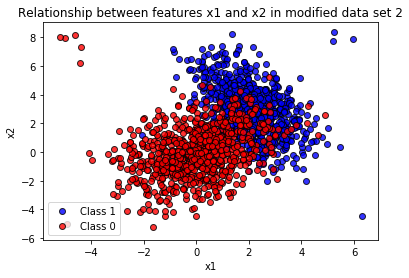

In [37]:
plt.scatter(df2m[df2m.y == 1]["x1"], df2m[df2m.y == 1]["x2"], c="blue", alpha=0.8, edgecolors="black")
plt.scatter(df2m[df2m.y == 0]["x1"], df2m[df2m.y == 0]["x2"], c="red", alpha=0.8, edgecolors="black")
plt.legend(("Class 1", "Class 0"))
plt.gca().set(title='Relationship between features x1 and x2 in modified data set 2', ylabel='x2', xlabel='x1')
plt.show()

<p>We notice that there are data points outside the main clusters that possibly changes the data distribution and make the life harder for a classifier directly assuming Gaussian distribution. It is also possible to observe that data points look closer, distances between data points kind of "shrinked".</p>

<h2><b>D.2) Bayes Classifier on Modified Data Set 2</b></h2>

In [38]:
g0, g1 = testBayes(df2m[["x1", "x2"]], df2m["y"], test2[["x1", "x2"]])
preds = np.zeros(g0.shape)
preds[g0 < g1] = 1
acc = preds[preds == np.array(test2["y"]).reshape(-1, 1)].shape[0]/np.array(test2["y"]).shape[0] * 100
print(f'Testing accuracy: {acc}%')
print(f'Testing error: {100 - acc}%')

Testing accuracy: 87.75%
Testing error: 12.25%


<h2><b>D.3) Interpretation and Comparison of Results</b></h2>

<p>As it was suspected, additional data points that differs from the general distribution of the underlying data caused a highly distribution dependent classifier such as we are using to get a worse performance in the test set.</p>

<p>The classifier we have designed uses a multivariate gaussian distribution. Since modified data differs from Gaussian, we ran into problems. Thus, we can say that if our assumptions about the data does not hold, our classifier will perform worse. We should use a more suitable model for underlying data.</p>